In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os



# read csv with all data info
filename = 'results/regression2/predictions.csv'
df = pd.read_csv(filename)

/Users/yapkan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df.head()

,artist,date,genre,style,title,filename,1,5,10,20,50,100,predictions
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1969,1965-1969,1960-1969,1960-1979,1950-1999,1900-1999,1927.5214
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1876,1875-1879,1870-1879,1860-1879,1850-1899,1800-1899,1899.2968
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1882,1880-1884,1880-1889,1880-1899,1850-1899,1800-1899,1902.8567
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1902,1900-1904,1900-1909,1900-1919,1900-1949,1900-1999,1905.8640
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1930,1930-1934,1930-1939,1920-1939,1900-1949,1900-1999,1920.9507


In [3]:
df['predictions'] = df['predictions'].round().astype(int)
df.head()

,artist,date,genre,style,title,filename,1,5,10,20,50,100,predictions
0,Marcel Broodthaers,1969,figurative,Conceptual Art,Minuit,14515.jpg,1969,1965-1969,1960-1969,1960-1979,1950-1999,1900-1999,1928
1,John Singer Sargent,1876,marina,Impressionism,Atlantic Storm,94528.jpg,1876,1875-1879,1870-1879,1860-1879,1850-1899,1800-1899,1899
2,William Merritt Chase,1882,interior,Impressionism,"The Inner Studio, Tenth Street",93146.jpg,1882,1880-1884,1880-1889,1880-1899,1850-1899,1800-1899,1903
3,Claude Monet,1902,landscape,Impressionism,Charing Cross Bridge 02,102612.jpg,1902,1900-1904,1900-1909,1900-1919,1900-1949,1900-1999,1906
4,Christopher Wood,1930,genre painting,Post-Impressionism,"Building the Boat, Tréboul",58078.jpg,1930,1930-1934,1930-1939,1920-1939,1900-1949,1900-1999,1921


In [4]:
bin = df['20'].str.split('-', expand=True).rename(columns = lambda x: "year"+str(x+1)).astype(int)
bin.head()

,year1,year2
0,1960,1979
1,1860,1879
2,1880,1899
3,1900,1919
4,1920,1939


In [5]:
df['accurate'] = df['predictions'].ge(bin['year1']) & df['predictions'].le(bin['year2'])

In [6]:
accuracy = df['accurate'].sum() / df.shape[0]
print(accuracy)

0.36097142156261497


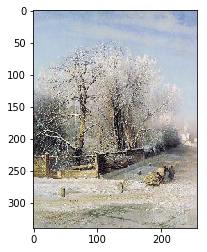

In [7]:
filename = df['filename'].iloc[1000]
img = image.load_img('data/train/' + filename)
plt.imshow(img)